## Коломейцев Юрий БД

## Лабораторная работа 2. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: *Surname_Name_Group_NN.ipynb*, где *NN* — номер лабораторной работы. Например, *Kozlova_Anna_CS_02.ipynb*.

## Данные


В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем в начале прочитать его до конца.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import math
from types import *

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [3]:
data = pd.read_csv("data.adult.csv")
data[:6]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [8]:
data.loc[:,['age', 'education']]

,age,education
0,34,HS-grad
1,40,Some-college
2,36,Bachelors
3,22,Some-college
4,47,Bachelors
5,18,Some-college
6,31,Assoc-acdm
7,18,11th
8,25,HS-grad
9,53,Bachelors


In [167]:
data = data.replace('?', np.nan)
missing_data = pd.isnull(data)
missing_data[missing_data == True].fillna(value=0).groupby('age').sum()

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
age,,,,,,,,,,,,,
0,929,0,0,0,0,933,0,0,0,0,0,0,0


Признаки, имеющие пропущенные значения:
 - workclass
 - occupation

In [4]:
print "size of set before deleting gaps: ", len(data)
data = data.dropna(how='any')
print "size of set after deleting gaps: ", len(data)

size of set before deleting gaps:  16280
size of set after deleting gaps:  15347


Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [5]:
train = data.drop(['>50K,<=50K'], axis=1)
train_real = train.drop(['workclass', 'education', 'marital-status', \
                         'occupation', 'relationship', 'race', 'sex'], axis=1)

label = LabelEncoder()
dicts = {}

label.fit(data['>50K,<=50K'].drop_duplicates())
dicts['>50K,<=50K'] = list(label.classes_)
target = label.transform(data['>50K,<=50K'])

print target, target.shape
train_real[:3]

[0 0 0 ..., 0 0 1] (15347,)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

В качестве оценки качества кросс-валидации использую AUC-ROC. Доверительный интервал строю с уровнем значимости $\alpha = 0.2$

In [6]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.linear_model import SGDClassifier as SGD

from sklearn import cross_validation

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

In [7]:
params = {'n_neighbors': np.arange(1, 100, 1)}
grid_searcher_KNN = GridSearchCV(KNN(),\
                             params, cv=5, scoring='roc_auc', n_jobs=3)
grid_searcher_KNN.fit(train_real, target)

print grid_searcher_KNN.best_score_
print grid_searcher_KNN.best_estimator_

0.640716052871
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=4, p=2, weights='uniform')


оптимальное число соседей - $4$

In [8]:
params = {'max_depth': np.arange(1, 100, 1)}
grid_searcher_tree = GridSearchCV(DecisionTree(),\
                             params, cv=5, scoring='roc_auc', n_jobs=3)
grid_searcher_tree.fit(train_real, target)

print grid_searcher_tree.best_score_
print grid_searcher_tree.best_estimator_

0.841515436859
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


оптимальная глубина - $7$

In [10]:
params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', \
          'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
grid_searcher_SGD = GridSearchCV(SGD(),\
                             params, cv=5, scoring='roc_auc', n_jobs=3)
grid_searcher_SGD.fit(train_real, target)

print grid_searcher_SGD.best_score_
print grid_searcher_SGD.best_estimator_

0.603796084183
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


оптимальная функция потерь - 'hinge'

In [11]:
z_half = -st.norm.ppf(.1)
def mean_quality_plot(grid_searcher, parameter):
    means = []
    stds = []
    for elem in grid_searcher.grid_scores_:
        means.append(np.mean(elem.cv_validation_scores))
        stds.append(math.sqrt(np.var(elem.cv_validation_scores)))
    means = np.array(means)
    stds = np.array(stds)
    
    params = grid_searcher.param_grid
    
    plt.figure(figsize=(8, 6))
    plt.title("Cross-validation mean quality with confidence interval", size=15)
    if type(params[parameter][0]) is StringType:
        X = range(len(params[parameter]))
        print dict(zip(X, params[parameter]))
    else:
        X = params[parameter]
    plt.plot(X, means)
    plt.fill_between(X, \
                 means + z_half*stds, means - z_half*stds, alpha = 0.5, facecolor='green')
    plt.xlabel(parameter)
    plt.ylabel('AUC')

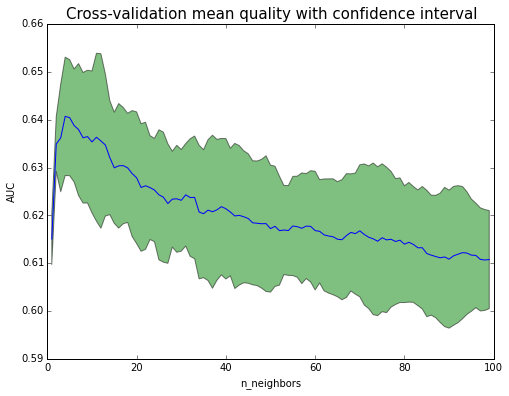

In [22]:
mean_quality_plot(grid_searcher_KNN, 'n_neighbors')

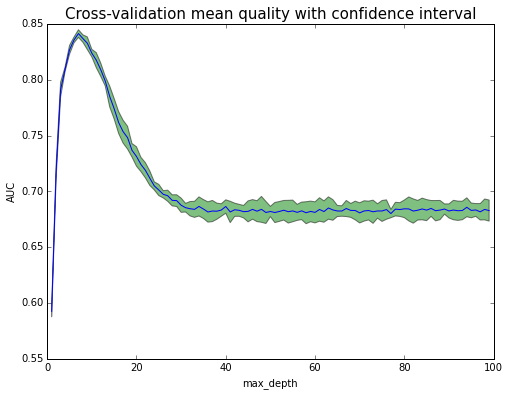

In [13]:
mean_quality_plot(grid_searcher_tree, 'max_depth')

{0: 'hinge', 1: 'log', 2: 'modified_huber', 3: 'squared_hinge', 4: 'perceptron', 5: 'squared_loss', 6: 'huber', 7: 'epsilon_insensitive', 8: 'squared_epsilon_insensitive'}


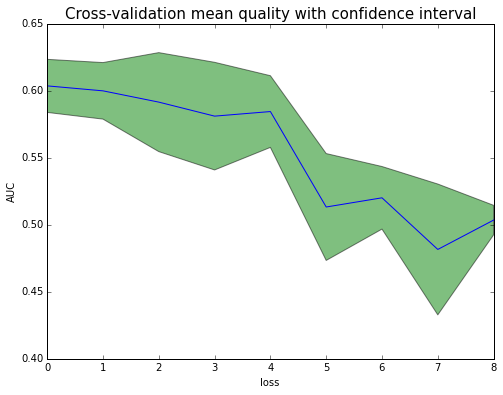

In [14]:
mean_quality_plot(grid_searcher_SGD, 'loss')

Что вы можете сказать о получившихся графиках?

Судя по получившимся графикам, самые оптимальные значения гиперпараметров алгоритмов kNN и DecisionTree, число соседей и глубина, лежат примерно в пределах от 3 до 15. При бОльших значениях этих параметров качество падает, что объясняется тем, что модель переобучается. В алгоритме SGD Linear Classifier видно, что функции потерь  'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron' дают примерно одинаковые оценки качества, также как и функции 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive' (хотя есть отличия в доверительных интервалах). Правда последняя группа функций потерь предназначена больше для регрессии, поэтому их качество меньше.


**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(n_estimators=50, n_jobs=3)

X_train, X_test, y_train, y_test = cross_validation.train_test_split( \
                                    train_real, target, test_size=0.9, random_state=1537)

In [104]:
def get_auc_list(X, y, clf):
    predictions = list()
    aucs = list()
    for i, tree in enumerate(clf.estimators_):
        predictions.append(tree.predict(X))
        rf_prediction = np.mean(predictions, axis=0)
        aucs.append(roc_auc_score(y, rf_prediction))
    return aucs

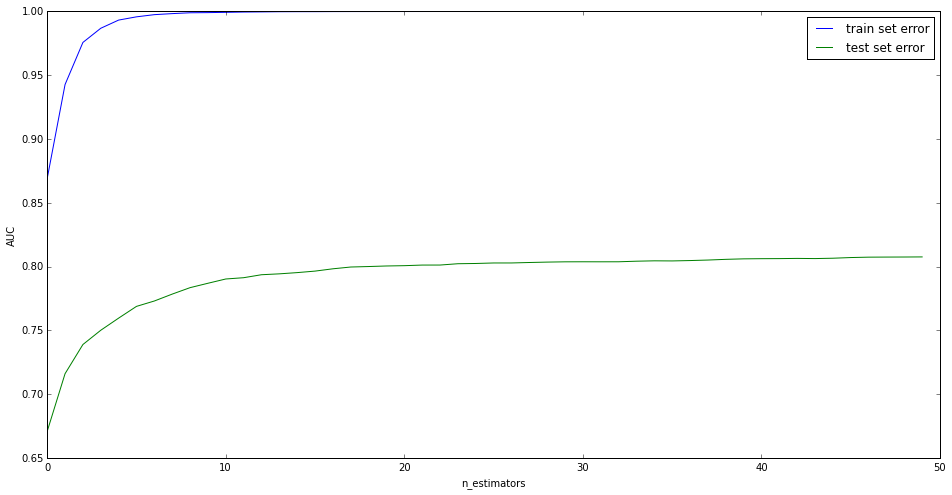

In [18]:
clf.fit(X_train, y_train)
train_auc = get_auc_list(X_train, y_train, clf)
test_auc = get_auc_list(X_test, y_test, clf)
plt.figure(figsize=(16, 8))
plt.plot(train_auc, label='train set error')
plt.plot(test_auc, label='test set error')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()

Качество на кросс-валидации стабилизируется при количестве деревьев примерно равном $20$.

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

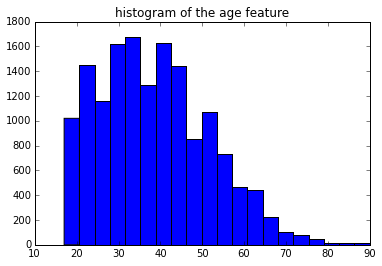

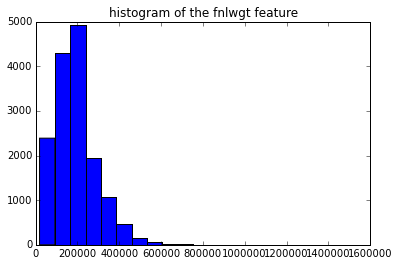

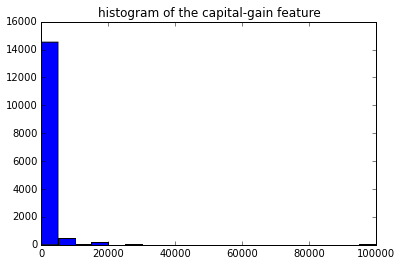

In [19]:
plt.hist(train_real['age'], bins=20)
plt.title("histogram of the age feature")
plt.show()
plt.hist(train_real['fnlwgt'], bins=20)
plt.title("histogram of the fnlwgt feature")
plt.show()
plt.hist(train_real['capital-gain'], bins=20)
plt.title("histogram of the capital-gain feature")
plt.show()

**(0.5 балла)** Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

Особенность данных заключается в том, что основная масса значений признаков age, fnlwgt, capital-gain лежит в разных диапазонах (age в диапазоне 10-100, fnlwgt в диапазоне 100000-400000, capital-gain в диапазоне 0-5000). Поэтому при работе некоторых алгоритмов наибольшее влияние оказывает признак fnlwgt, а признак age вообще практически не учитывается.

Это влияет на алгоритм kNN, так как вычисляется расстояние между объектами. А также влияет на алгоритм SGD, так как метод, которым оптимизируется функция потерь, чувствителен к соотношениям между признаками. И чем больше эти соотношения, тем хуже сходимость.

Масштабирование может улучшить работу этих алгоритмов.

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_real)
train_real_scaled = scaler.transform(train_real)
print train_real_scaled

[[-0.3429185   0.90025802 -0.45078777 -0.06559951 -0.21874041  1.58822305]
 [ 0.11476013  0.01068271 -0.05908582 -0.15043862 -0.21874041 -0.07417817]
 [-0.19035896 -0.10628026  1.11602004 -0.15043862 -0.21874041 -0.07417817]
 ..., 
 [-0.8768769  -0.79685293  1.11602004 -0.15043862 -0.21874041 -0.07417817]
 [ 1.56407578  0.74838115 -0.45078777 -0.15043862 -0.21874041 -0.07417817]
 [-0.41919828 -1.22374144  1.11602004 -0.15043862  4.47344431  0.34142214]]


In [23]:
grid_searcher_KNN.fit(train_real_scaled, target)

print grid_searcher_KNN.best_score_
print grid_searcher_KNN.best_estimator_

0.834238589653
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=39, p=2, weights='uniform')


оптимальное число соседей - $39$

In [24]:
grid_searcher_tree.fit(train_real_scaled, target)

print grid_searcher_tree.best_score_
print grid_searcher_tree.best_estimator_

0.841655080435
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


оптимальная глубина - $7$

In [25]:
grid_searcher_SGD.fit(train_real_scaled, target)

print grid_searcher_SGD.best_score_
print grid_searcher_SGD.best_estimator_

0.796900049852
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


оптимальная функция потерь - 'hinge'

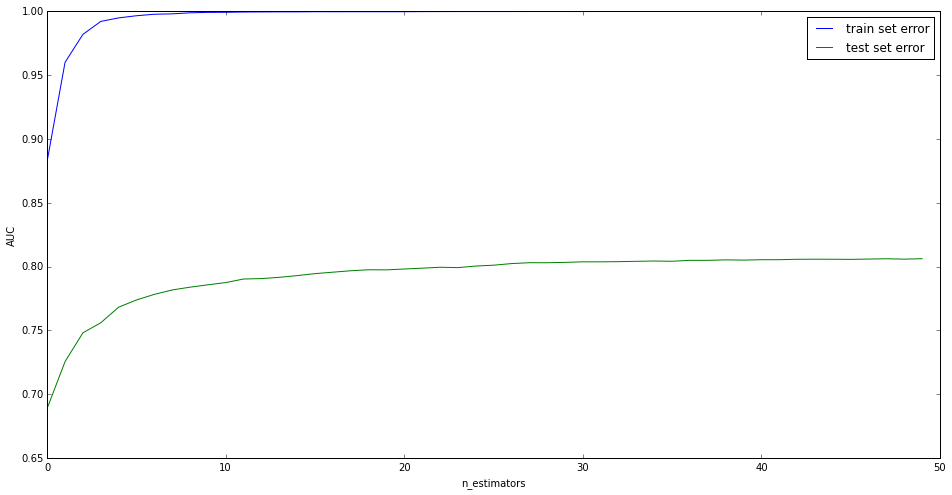

In [26]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split( \
                                train_real_scaled, target, test_size=0.9, random_state=1537)
clf.fit(X_train, y_train)
train_auc = get_auc_list(X_train, y_train, clf)
test_auc = get_auc_list(X_test, y_test, clf)
plt.figure(figsize=(16, 8))
plt.plot(train_auc, label='train set error')
plt.plot(test_auc, label='test set error')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.legend()

оптимальное количество деревьев в лесу - примерно $20$

Изменилось ли качество у некоторых алгоритмов?

 - Качество алгоритма kNN заметно улучшилось: лучшая оценка ROC AUC была 0.64, а стала 0.83.

 - Качество алгоритма SGD, как и предполагалось, тоже улучшилось: оценка ROC AUC была 0.59, а стала 0.8.

 - Качество алгоритмов решающих деревьев и лесов не изменилось.

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [168]:
params = {'n_neighbors': np.arange(1, 50, 1), 'metric': ['euclidean', 'manhattan', 'chebyshev']}
grid_searcher_KNN_2param = GridSearchCV(KNN(),\
                             params, cv=5, scoring='roc_auc', n_jobs=3)
grid_searcher_KNN_2param.fit(train_real_scaled, target)

print grid_searcher_KNN_2param.best_score_
print grid_searcher_KNN_2param.best_estimator_

0.834451395837
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_neighbors=41, p=2, weights='uniform')


Оптимальная комбинация параметров для kNN - манхэттэнская метрика и $41$ сосед.

In [328]:
params = {'max_depth': np.arange(1, 50, 1), 'criterion': ['gini', 'entropy']}
grid_searcher_tree_2param = GridSearchCV(DecisionTree(),\
                             params, cv=5, scoring='roc_auc', n_jobs=3)
grid_searcher_tree_2param.fit(train_real, target)

print grid_searcher_tree_2param.best_score_
print grid_searcher_tree_2param.best_estimator_

0.842739094391
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


Оптимальная комбинация параметров для дерева решений - глубина $8$ и энтропийный критерий.

In [84]:
params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', \
          'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': ['l2', 'l1', 'elasticnet']}
grid_searcher_SGD_2param = GridSearchCV(SGD(),\
                             params, cv=5, scoring='roc_auc', n_jobs=3)
grid_searcher_SGD_2param.fit(train_real_scaled, target)

print grid_searcher_SGD_2param.best_score_
print grid_searcher_SGD_2param.best_estimator_

0.809061738328
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


Оптимальная комбинация для алгоритма стохастического градиентного спуска - логарифмическая функция потерь вместе с elasticnet пенализацией.

In [339]:
params = {'criterion': ['gini', 'entropy'], 'max_features': np.arange(1, train_real_scaled.shape[1], 1)}
grid_searcher_forest_2param = GridSearchCV(RandomForestClassifier(n_estimators=20),\
                             params, cv=5, scoring='roc_auc', n_jobs=3)
grid_searcher_forest_2param.fit(train_real_scaled, target)

print grid_searcher_forest_2param.best_score_
print grid_searcher_forest_2param.best_estimator_

0.812519370979
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Оптимальная комбинация для случайного леса - энтропийный критерий и максимальное число признаков равное 4.

Какой из алгоритмов имеет наилучшее качество? 

Наилучшее качество имеет алгоритм DecisionTree, его оценка равна $0.8427$

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [39]:
clf_knn = KNN(metric='manhattan', n_neighbors=41)
clf_knn_brute = KNN(algorithm='brute', metric='manhattan', n_neighbors=41)
cll_tree = DecisionTree(criterion='entropy', max_depth=8)
clf_forest = RandomForestClassifier(n_estimators=20, criterion='entropy', max_features=4, n_jobs=4)
clf_sgd = SGD(loss='log', penalty='l1')

In [40]:
the_time = %timeit -o -n 10 clf_knn.fit(train_real_scaled, target)

10 loops, best of 3: 320 ms per loop


In [41]:
the_time = %timeit -o -n 10 clf_knn_brute.fit(train_real_scaled, target)

10 loops, best of 3: 883 µs per loop


In [42]:
the_time = %timeit -o -n 10 cll_tree.fit(train_real_scaled, target)

10 loops, best of 3: 49 ms per loop


In [43]:
the_time = %timeit -o -n 10 clf_forest.fit(train_real_scaled, target)

10 loops, best of 3: 478 ms per loop


In [44]:
the_time = %timeit -o -n 10 clf_sgd.fit(train_real_scaled, target)

10 loops, best of 3: 11 ms per loop


Быстрее всего обучается алгоритм KNN с brute-force параметром, так как процесса обучения как такового нет. Также довольно быстро работает обучения алгоритма стохастического градиентного спуска, так как ему не надо обучаться на всей выборке целиком.

В данном случае дольше всего обучается алгоритм случайного леса ($478$ мсек), и связано это с тем, что ему надо обучить $20$ деревьев (хотя некоторое ускорение ему дает распараллеливание).

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [71]:
train_all_features = pd.get_dummies(train)

train_all_features.loc[:, ['age', 'fnlwgt', 'education-num', 'capital-gain', \
                           'capital-loss', 'hours-per-week']] = train_real_scaled

train_all_features[:5]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.21874,-0.905379,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,0.648719,-0.371197,1.116020,1.995391,-0.21874,-0.074178,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

In [173]:
clf_knn_all = KNN(metric='manhattan', n_neighbors=41)
clf_tree_all = DecisionTree(criterion='entropy', max_depth=8)
clf_forest_all = RandomForestClassifier(n_estimators=20, criterion='entropy', max_features=4, n_jobs=4)
clf_sgd_all = SGD(loss='log', penalty='l1')

In [73]:
from sklearn.cross_validation import cross_val_score

In [74]:
scores_knn = cross_val_score(clf_knn_all, train_all_features, target, scoring='roc_auc', \
                             cv=5, n_jobs=3)
scores_knn

array([ 0.88547093,  0.89756097,  0.89247247,  0.88847314,  0.88389132])

In [75]:
scores_knn.mean()

0.8895737654981335

In [78]:
scores_tree = cross_val_score(clf_tree_all, train_all_features, target, scoring='roc_auc',\
                              cv=5, n_jobs=3)
scores_tree

array([ 0.88649917,  0.89042668,  0.89909804,  0.89311644,  0.87850056])

In [79]:
scores_tree.mean()

0.88952817942389861

In [174]:
scores_forest = cross_val_score(clf_forest_all, train_all_features, target,\
                                scoring='roc_auc', cv=5, n_jobs=3)
scores_forest

array([ 0.88870553,  0.88977131,  0.88797994,  0.87592966,  0.88442625])

In [175]:
scores_forest.mean()

0.88536253582943658

In [82]:
scores_sgd = cross_val_score(clf_sgd_all, train_all_features, target, scoring='roc_auc',\
                              cv=5, n_jobs=3)
scores_sgd

array([ 0.89207442,  0.88797258,  0.88973773,  0.89910138,  0.89760285])

In [83]:
scores_sgd.mean()

0.89329779250821884

Добавление новых признаков дало прирост качества. У всех алгоритмов улучшилась оценка.

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Наилучший классификатор теперь отличается от того, что был в предыдущем пунтке.


В предыдущем пункте наилучшее качество имеел алгоритм Decision Tree, с оценкой равной $0.8427$.

В этом пункте - алгоритм SGD, с оценкой, равной $0.8933$.

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

В качестве классификаторов возьму: Decision Tree и SGD.

In [126]:
from sklearn.cross_validation import KFold
from collections import OrderedDict

In [127]:
alphas = np.arange(0, 1, 0.1)

scores = OrderedDict()

for alpha in alphas:
    kf = KFold(len(train_all_features), n_folds=5)
    cv_scores = []
    for train_index, test_index in kf:
        X_train = train_all_features.iloc[train_index,:]
        X_test = train_all_features.iloc[test_index, :]
        y_train, y_test = target[train_index], target[test_index]
        clf_tree_all.fit(X_train, y_train)
        clf_sgd_all.fit(X_train, y_train)
        y_predicted_tree = clf_tree_all.predict_proba(X_test)[:,1]
        y_predicted_sgd = clf_sgd_all.predict_proba(X_test)[:,1]
        result = y_predicted_tree * alpha + y_predicted_sgd * (1 - alpha)
        cv_scores.append(roc_auc_score(y_test, result))
    scores[alpha] = cv_scores

In [134]:
z_half = -st.norm.ppf(.1)
def mean_quality_plot_alpha(scores, alphas):
    means = []
    stds = []
    for elem in scores:
        means.append(np.mean(scores[elem]))
        stds.append(math.sqrt(np.var(scores[elem])))
    means = np.array(means)
    stds = np.array(stds)

    plt.figure(figsize=(16, 8))
    plt.title('Cross-validation mean scores with confidence interval', size = 15)
    plt.plot(alphas, means)
    plt.fill_between(alphas, \
                 means + z_half*stds, means - z_half*stds, alpha = 0.3, facecolor='green')
    plt.xlabel('alpha')
    plt.ylabel('AUC')

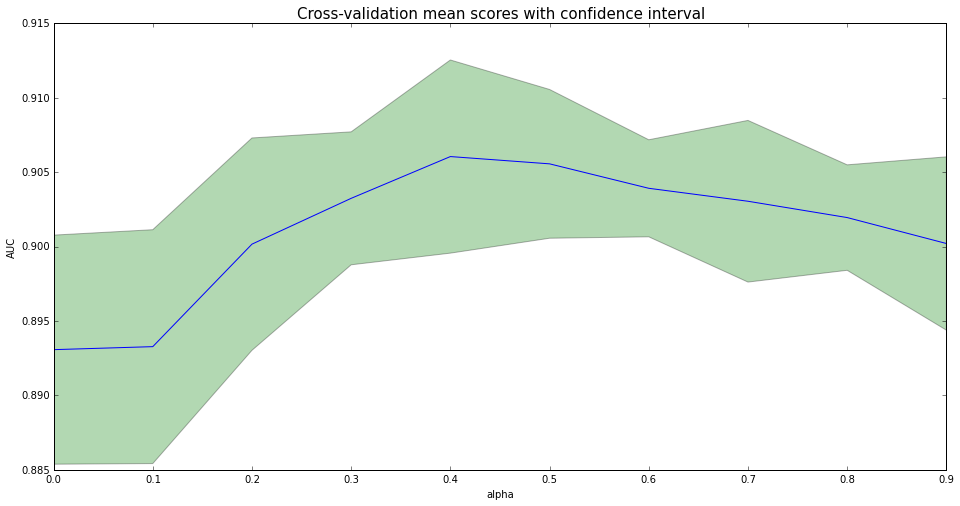

In [135]:
mean_quality_plot_alpha(scores, alphas)

In [142]:
scores_mixed = scores[0.4]
np.mean(scores_mixed)

0.90605101093162543

Максимальная оценка получается при $\alpha = 0.4$ и равна $0.906$.

Данный подход дал небольшой прирост по сравнению с моделями ранее. (Ранее максимальная средняя оценка по кросс-валидации равнялась $0.8933$)

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. На семинаре по визуализации вам было показано как строить "ящик с усами" (диаграмму размаха). Воспользуемся ей для сравнения алгоритмов между собой. 

**(1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

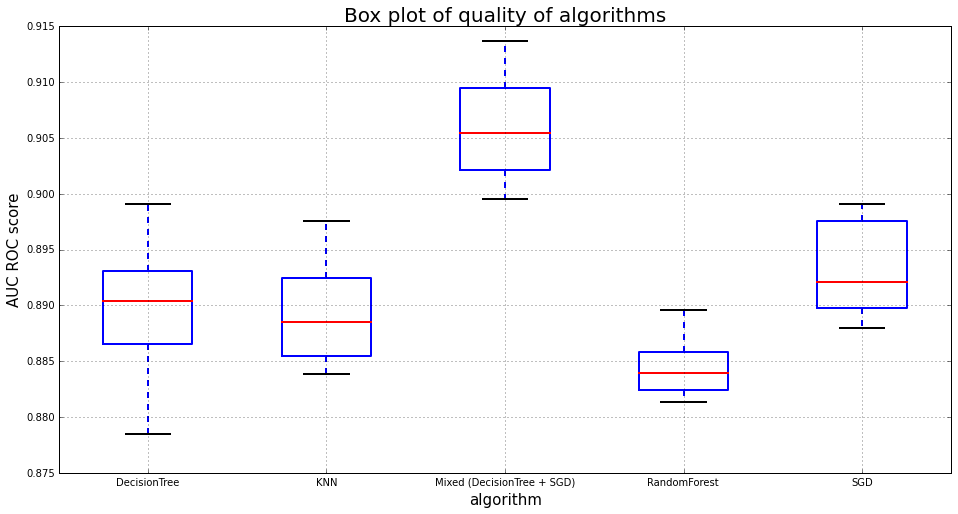

In [157]:
final_scores = pd.DataFrame({'KNN': scores_knn, 'DecisionTree': scores_tree, \
                        'RandomForest': scores_forest, 'SGD': scores_sgd,
                        'Mixed (DecisionTree + SGD)': scores_mixed})

plt.figure(figsize=(16, 8))
plt.xlabel('algorithm', size=15)
plt.ylabel('AUC ROC score', size=15)
plt.title('Box plot of quality of algorithms', size=20)
ax = final_scores.boxplot(return_type='axes', sym='k.')
_ = plt.setp(ax.lines, linewidth=2.0)


В качестве вывода можно сказать, что существует множество различных факторов влияющих на классификаторы, которые необходимо учитывать при анализе данных (масштабирование данных, учет пропусков в данных, включение в модель категориальных признаков).

Были рассмотрены следующие классификаторы:
 - **KNN:** для этой модели были оптимизированы гиперпараметры: число соседей и метрика. Наилучший результат показала пара: 41 сосед с манхэттэнской метрикой. Гиперпараметр "число соседей" сильно влияет на качество модели.
 - **Decision Tree:** оптимизированные гиперпараметры: максимальная глубина и критерий информативности. Лучший результат у энтропийного критерия с максимальной глубиной, равной $8$. Глубина дерева сильно влияет на качество модели. (критерий не сильно)
 - **Random Forest:** оптимизированные гиперпараметры: число деревьев в лесу, максимальное число рассматриваемых при делении признаков и критерий информативности. Наилучший результат: 20 деревьев, энтропийный критерий, 4 признака. Сначала от числа деревьев оценка зависит сильно, но с какого-то момента увеличение количества деревьев перестает значимо улучшать оценку.
 - **SGD:** оптимизированные гиперпараметры: функция потерь и пенализация. Наилучший результат у логарифмической функции потерь и $l1$ пенализации. Эти гиперпараметры несильно влияют на качество (конечно, если не использовать функции потерь, предназначенные для регрессии)
 - **Смешивание моделей:** я смешал модели: Decision Tree вместе с SGD. Оптимизированный гиперпараметр - коэффициент $\alpha \in (0, 1)$ при суммировании результатов работы каждой модели. Он не особо сильно влияет на оценку, но наилучшая получилась при $\alpha = 0.4$ Также стоит отметить, что этот подход дал самые лучшие оценки из всех построенных моделей.